In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.impute import SimpleImputer

### 0. print current working directory
The dataset in the current working directory

In [4]:
print(os.getcwd())

/Users/deng/ws/misc/da_assignment


### <span style="color:blue">Q1-1. Load the dataset. (1)</span>

In [5]:
df = pd.read_csv('Life_Expectancy_Data.csv')

### <span style="color:blue">Q1-2. Display the first 20 rows. (1)</span>

In [6]:
df.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


### <span style="color:blue">Q1-3. Find the number of null values in the dataset. (1)</span>

In [7]:
# It will be used in the folloing tasks, so I define a function
def null_info(df):
    null_counts = df.isna().sum()
    total_null = null_counts.sum()
    print(f'Total number of null values: {total_null}')
    return null_counts

null_info(df)

Total number of null values: 2563


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### <span style="color:blue">Q1-4. Impute the missing values with the mean values of the data. You can use SimpleImputer from sklearn.impute. (1) <span>
Bonus: Instead of imputing the missing values with the mean value of the whole column, impute it with the mean value of the column that corresponds to the country. (1 bonus point)

In [8]:
# before imputing, display 10 rows with null values
null_rows = df[df.isna().any(axis=1)].head(10)
null_rows

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
57,Angola,2006,Developing,47.7,381.0,90,5.84,25.086888,NaN,765,...,36.0,4.54,34.0,2.5,262.415149,2262399.0,9.8,9.7,0.439,7.2
58,Angola,2005,Developing,47.4,382.0,92,5.04,98.191451,NaN,258,...,39.0,4.10,38.0,2.6,1443.991929,19552542.0,1.0,9.9,0.426,6.8
59,Angola,2004,Developing,47.1,386.0,94,3.53,8.866777,NaN,29,...,4.0,4.71,4.0,2.5,141.868440,18865716.0,1.2,1.1,0.415,6.4
60,Angola,2003,Developing,46.8,388.0,95,3.49,35.933491,NaN,1196,...,4.0,4.41,4.0,2.4,779.468356,1823369.0,1.4,1.3,0.406,5.9


In [9]:
# Imputing the missing values with the mean value of the whole column
mean_imputer = SimpleImputer(strategy='mean')

df_copy = df.copy(deep=True)

numeric_columns = df_copy.select_dtypes(include=[np.number])
df_copy[numeric_columns.columns] = mean_imputer.fit_transform(numeric_columns)

In [10]:
# No any null values is expected result
null_info(df_copy)

Total number of null values: 0


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [11]:
# check the imputing result
df_copy[df_copy['Country'].isin(null_rows['Country'])].head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015.0,Developing,75.6,19.0,21.0,4.602861,0.000000,95.0,63.0,...,95.0,5.93819,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
33,Algeria,2014.0,Developing,75.4,11.0,21.0,0.010000,54.237318,95.0,0.0,...,95.0,7.21000,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
34,Algeria,2013.0,Developing,75.3,112.0,21.0,0.530000,544.450743,95.0,25.0,...,95.0,7.12000,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
35,Algeria,2012.0,Developing,75.1,113.0,21.0,0.660000,555.926083,95.0,18.0,...,95.0,6.14000,95.0,0.1,5564.825660,37565847.0,5.9,5.8,0.732,14.4
36,Algeria,2011.0,Developing,74.9,116.0,21.0,0.560000,509.002041,95.0,112.0,...,95.0,5.29000,95.0,0.1,5432.252300,36819558.0,5.9,5.8,0.724,14.0
37,Algeria,2010.0,Developing,74.7,119.0,21.0,0.450000,430.717586,95.0,103.0,...,95.0,5.12000,95.0,0.1,4463.394675,36117637.0,5.9,5.8,0.714,13.6
38,Algeria,2009.0,Developing,74.4,123.0,20.0,0.500000,352.063642,94.0,107.0,...,94.0,5.36000,95.0,0.1,3868.831230,3546576.0,6.0,5.9,0.705,13.1
39,Algeria,2008.0,Developing,74.1,126.0,20.0,0.460000,43.087173,91.0,217.0,...,92.0,4.20000,93.0,0.1,495.254866,3486715.0,6.0,5.9,0.697,12.6
40,Algeria,2007.0,Developing,73.8,129.0,20.0,0.440000,320.323924,9.0,0.0,...,95.0,3.82000,95.0,0.1,3935.183343,34376.0,6.0,5.9,0.690,12.3
41,Algeria,2006.0,Developing,73.4,132.0,20.0,0.360000,270.240196,8.0,944.0,...,95.0,3.36000,95.0,0.1,3464.617900,33777915.0,6.1,6.0,0.686,12.3


In [70]:
# impute null values with the mean value of the column that corresponds to the country
df_copy = df.copy(deep=True)

numeric_columns = df_copy.select_dtypes(include=[np.number])

impute_group_mean = lambda x: x.fillna(x.mean())

df_copy[numeric_columns.columns] = df_copy.groupby('Country')[numeric_columns.columns].apply(impute_group_mean).reset_index(drop=True)

# NOTE: still some countries with null group mean, need to fillna with the whole mean
df_copy[numeric_columns.columns] = mean_imputer.fit_transform(numeric_columns)

In [13]:
null_info(df_copy)

Total number of null values: 0


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [14]:
df_copy[df_copy['Country'].isin(null_rows['Country'])].head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015.0,Developing,75.6,19.0,21.0,4.602861,0.000000,95.0,63.0,...,95.0,5.93819,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
33,Algeria,2014.0,Developing,75.4,11.0,21.0,0.010000,54.237318,95.0,0.0,...,95.0,7.21000,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
34,Algeria,2013.0,Developing,75.3,112.0,21.0,0.530000,544.450743,95.0,25.0,...,95.0,7.12000,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
35,Algeria,2012.0,Developing,75.1,113.0,21.0,0.660000,555.926083,95.0,18.0,...,95.0,6.14000,95.0,0.1,5564.825660,37565847.0,5.9,5.8,0.732,14.4
36,Algeria,2011.0,Developing,74.9,116.0,21.0,0.560000,509.002041,95.0,112.0,...,95.0,5.29000,95.0,0.1,5432.252300,36819558.0,5.9,5.8,0.724,14.0
37,Algeria,2010.0,Developing,74.7,119.0,21.0,0.450000,430.717586,95.0,103.0,...,95.0,5.12000,95.0,0.1,4463.394675,36117637.0,5.9,5.8,0.714,13.6
38,Algeria,2009.0,Developing,74.4,123.0,20.0,0.500000,352.063642,94.0,107.0,...,94.0,5.36000,95.0,0.1,3868.831230,3546576.0,6.0,5.9,0.705,13.1
39,Algeria,2008.0,Developing,74.1,126.0,20.0,0.460000,43.087173,91.0,217.0,...,92.0,4.20000,93.0,0.1,495.254866,3486715.0,6.0,5.9,0.697,12.6
40,Algeria,2007.0,Developing,73.8,129.0,20.0,0.440000,320.323924,9.0,0.0,...,95.0,3.82000,95.0,0.1,3935.183343,34376.0,6.0,5.9,0.690,12.3
41,Algeria,2006.0,Developing,73.4,132.0,20.0,0.360000,270.240196,8.0,944.0,...,95.0,3.36000,95.0,0.1,3464.617900,33777915.0,6.1,6.0,0.686,12.3


### <span style="color:blue">Q1-5. Find the count, mean, standard deviation, quartiles and extrema for the numeric columns. (1)</span>

In [15]:
df_copy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [71]:
# I will use 'pf' as the dataset's ref for folloing tasks
df = df_copy
df.columns = (df.columns.str.strip())

### <span style="color:blue">Q1-6. Find the correlation between the numeric columns and display your findings on a heatmap. (2)</span>

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0

In [98]:
data = df[df.Year == 2015]
data['avgGDP'] = data.apply(lambda x : x['GDP']/x['Population'], axis=1)
data

/var/folders/61/_l47ndkx3bb_mj0khn026y080000gn/T/ipykernel_26784/2851804178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avgGDP'] = data.apply(lambda x : x['GDP']/x['Population'], axis=1)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,avgGDP
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.010000,71.279624,65.0,1154.0,...,8.16000,65.0,0.1,584.259210,3.373649e+07,17.2,17.3,0.479,10.1,0.000017
16,Albania,2015.0,Developing,77.8,74.0,0.0,4.600000,364.975229,99.0,0.0,...,6.00000,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2,0.136952
32,Algeria,2015.0,Developing,75.6,19.0,21.0,4.602861,0.000000,95.0,63.0,...,5.93819,95.0,0.1,4132.762920,3.987153e+07,6.0,5.8,0.743,14.4,0.000104
48,Angola,2015.0,Developing,52.4,335.0,66.0,4.602861,0.000000,64.0,118.0,...,5.93819,64.0,1.9,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4,0.001327
64,Antigua and Barbuda,2015.0,Developing,76.4,13.0,0.0,4.602861,0.000000,99.0,0.0,...,5.93819,99.0,0.2,13566.954100,1.275338e+07,3.3,3.3,0.784,13.9,0.001064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015.0,Developing,74.1,157.0,9.0,4.602861,0.000000,87.0,0.0,...,5.93819,87.0,0.1,7483.158469,1.275338e+07,1.6,1.5,0.769,14.3,0.000587
2874,Viet Nam,2015.0,Developing,76.0,127.0,28.0,4.602861,0.000000,97.0,256.0,...,5.93819,97.0,0.1,7483.158469,1.275338e+07,14.2,14.5,0.678,12.6,0.000587
2890,Yemen,2015.0,Developing,65.7,224.0,37.0,4.602861,0.000000,69.0,468.0,...,5.93819,69.0,0.1,7483.158469,1.275338e+07,13.6,13.4,0.499,9.0,0.000587
2906,Zambia,2015.0,Developing,61.8,33.0,27.0,4.602861,0.000000,9.0,9.0,...,5.93819,9.0,4.1,1313.889646,1.615870e+05,6.3,6.1,0.576,12.5,0.008131


### <span style="color:blue">Q1-7. Plot a histogram of the life expectancy. (2)</span>

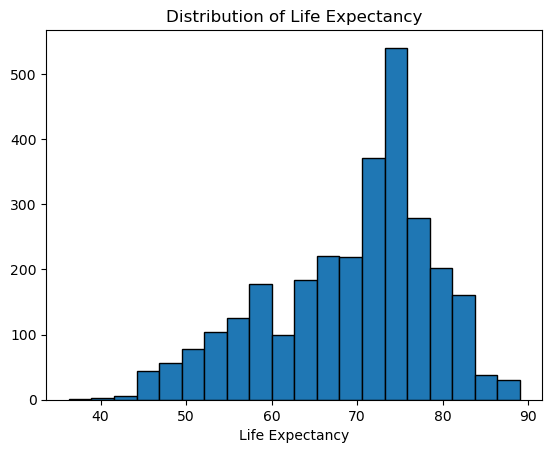

In [17]:
plt.hist(df["Life expectancy"], 20, edgecolor='black')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.show()

### <span style="color:blue">Q1-8. Compamre the life expectancy in developed countries to that in developing countries using violin plots next to each other. (2)</span>

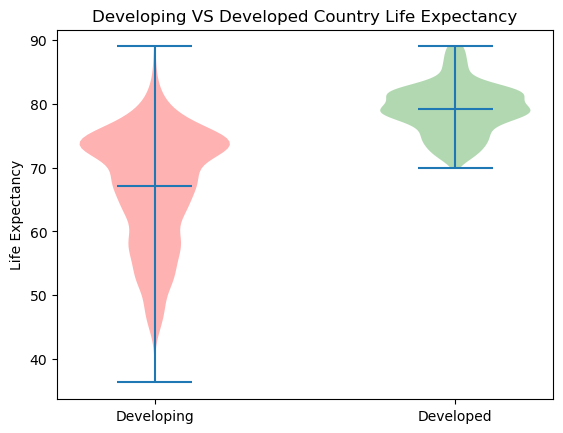

In [78]:
developed = df[df['Status'] == 'Developed']['Life expectancy']
developing = df[df['Status'] == 'Developing']['Life expectancy']
data = [developing, developed]
violin_parts = plt.violinplot(data, showmeans=True)
violin_parts['bodies'][0].set_facecolor('red')
violin_parts['bodies'][1].set_facecolor('green')
plt.xticks([1, 2], ['Developing', 'Developed'])
plt.title('Developing VS Developed Country Life Expectancy')
plt.ylabel('Life Expectancy')
plt.show()

### <span style="color:blue">Q1-9. On the same line plot, display the life expectancy from 2000 to 2015 for Canada, the United Kingdom and the United States of America. (2)</span>

{'c': 'Canada', 's': 'Canada'}
{'c': 'United Kingdom of Great Britain and Northern Ireland', 's': 'UK'}
{'c': 'United States of America', 's': 'USA'}


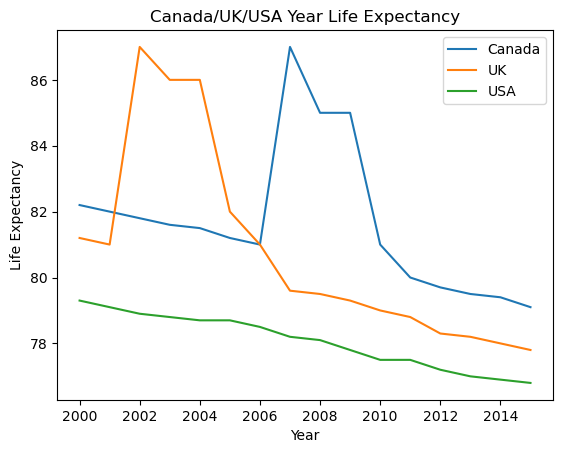

In [79]:
countries = ['Canada', 'United Kingdom of Great Britain and Northern Ireland/UK', 'United States of America/USA']
# some countries have a long name
# config a short name for chart displaying
def country_info(country):
    items = country.split('/')
    c = country
    s = c
    if len(items) > 1:
        c = items[0]
        s = items[1]
    return {'c':c, 's':s}

start = 2000
end = 2015
for country in countries:
    c_info = country_info(country)
    print(c_info)
    data = df[(df['Country'] == c_info['c']) & (df['Year'].between(start, end))]['Life expectancy']
    plt.plot(list(range(start, end + 1)), data, label=c_info['s'])

plt.title('Canada/UK/USA Year Life Expectancy')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

### <span style="color:blue">Q1-10. Compare the average infant deaths over the years against the average life expectancy over the years using a scatter plot for the following countries: Belgium, Brazil, Cameroon, Canada, China, France, Ghana, India, the United Kingdom and the United States of America. What can you conclude? (2)</span>

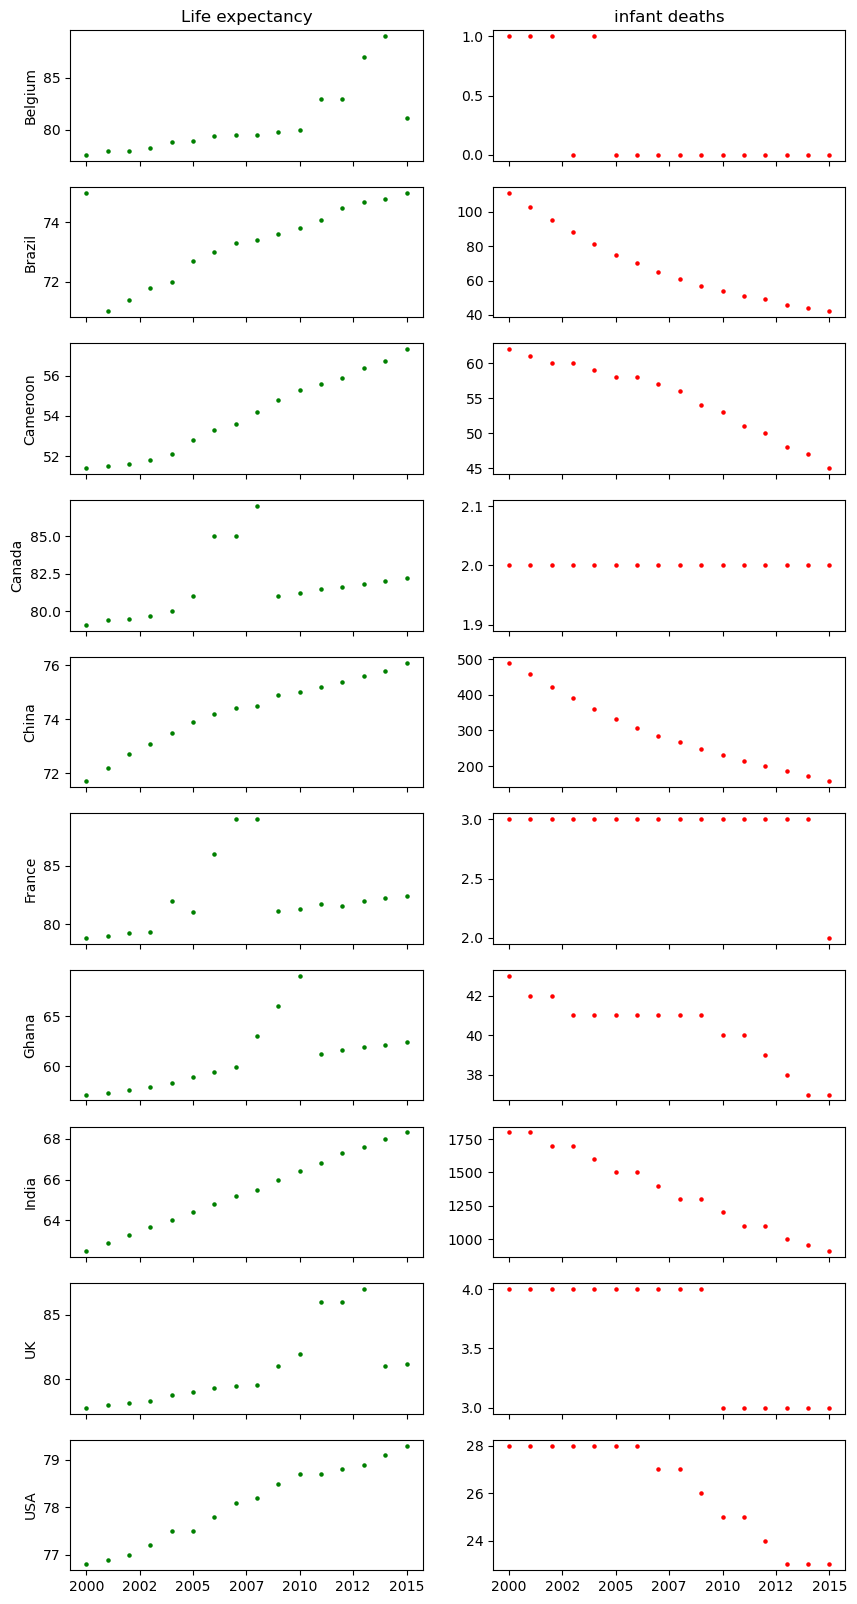

In [83]:
import matplotlib.ticker as ticker

countries = ['Belgium','Brazil', 'Cameroon', 'Canada', 'China','France', 'Ghana', 'India',  
             'United Kingdom of Great Britain and Northern Ireland/UK', 'United States of America/USA']

fig, axs = plt.subplots(len(countries), 2, figsize=(10, 20), sharex=True)

i = 0
for c in countries:
    country = country_info(c)['c']
    items = c.split('/')
    if len(items) > 1:
        country = items[0]
            
    data = df[df['Country'] == country]
    
    axs[i, 0].scatter(data['Year'].astype(int), data['Life expectancy'], 5, c='green')
    axs[i, 1].scatter(data['Year'].astype(int), data['infant deaths'], 5, c='red')
    
    if i == 0:
        axs[i, 0].set_title('Life expectancy')
        axs[i, 1].set_title('infant deaths')
    
    i = i + 1

i = 0
for ax in axs.flat:
    # remove decimal places for years 
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    if i % 2 == 0 :
        ax.set(ylabel=country_info(countries[i//2])['s'])
    else:
        ax.set(ylabel='')
    i = i + 1

plt.show()

#### My conclusion : Life expectancy increased for all countries, but infant deaths decreased significantly in developing countries, especially in India and China, due to their previously high infant mortality rates.

### <span style="color:blue">Q1-11. In the year 2012</span>

#### 11.a. Compare the life expectancy with schooling using a scatter plot. (2) 

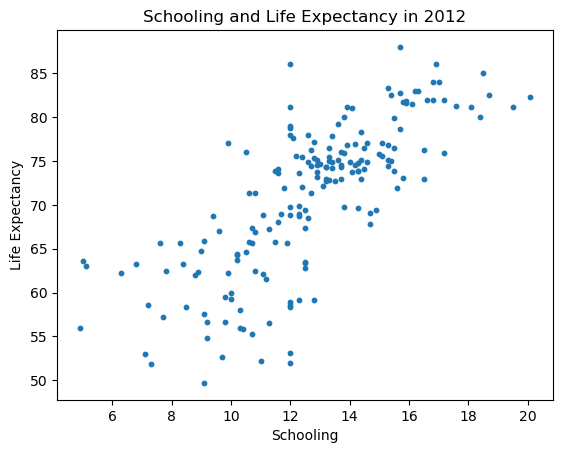

In [85]:
year = 2012
data = df[df['Year']==2012]
plt.scatter(data['Schooling'], data['Life expectancy'], 10)
plt.title('Schooling and Life Expectancy in ' + str(year))
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.show()

#### 11.b. What is the Pearson correlation? (1)

The Pearson correlation measures the strength of the linear relationship between two variables. It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.

#### 11.c. Draw the best regression line on the same plot as (a). (1)

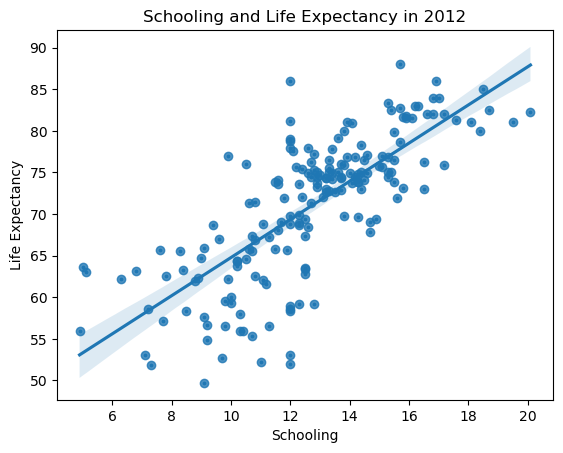

In [86]:
year = 2012
data = df[df['Year']==2012]
plt.scatter(data['Schooling'], data['Life expectancy'], 3)
sns.regplot(x='Schooling', y='Life expectancy', data=data)
plt.title('Schooling and Life Expectancy in ' + str(year))
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.show()

#### 11.d. What can you conclude? (1)

There is some correlation between schooling and life expectancy, but it is not very strong.

### <span style="color:blue">Q2-1. Load the dataset. (1)</span>

In [75]:
df = pd.read_csv('text.csv')

### <span style="color:blue">Q2-2. Display the first 5 rows. (1)</span>

In [45]:
df.head(5)

,Unnamed: 0,label,review
0,0,neg,how do films like mouse hunt get into theatres...
1,1,neg,some talented actresses are blessed with a dem...
2,2,pos,this has been an extraordinary year for austra...
3,3,pos,according to hollywood movies made in last few...
4,4,neg,my first press screening of 1998 and already i...


### <span style="color:blue">Q2-3. Convert the text in the review column to lowercase.(1)</span>

In [76]:
df['cleaned_review'] = df['review'].str.lower()
df['cleaned_review'] = df['cleaned_review'].fillna('')
df.head(5)

,Unnamed: 0,label,review,cleaned_review
0,0,neg,how do films like mouse hunt get into theatres...,how do films like mouse hunt get into theatres...
1,1,neg,some talented actresses are blessed with a dem...,some talented actresses are blessed with a dem...
2,2,pos,this has been an extraordinary year for austra...,this has been an extraordinary year for austra...
3,3,pos,according to hollywood movies made in last few...,according to hollywood movies made in last few...
4,4,neg,my first press screening of 1998 and already i...,my first press screening of 1998 and already i...


### <span style="color:blue">Q2-4. Remove stopwords. (2)</span>

In [77]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

sw_list = stopwords.words('english')
remove_fun = lambda x: ' '.join([word for word in word_tokenize(x) if word not in sw_list])

df['cleaned_review'] = df['cleaned_review'].apply(remove_fun)
df.head(5)

[nltk_data] Downloading package stopwords to /Users/deng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/deng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0,label,review,cleaned_review
0,0,neg,how do films like mouse hunt get into theatres...,films like mouse hunt get theatres ? n't law s...
1,1,neg,some talented actresses are blessed with a dem...,talented actresses blessed demonstrated wide a...
2,2,pos,this has been an extraordinary year for austra...,extraordinary year australian films . `` shine...
3,3,pos,according to hollywood movies made in last few...,"according hollywood movies made last decades ,..."
4,4,neg,my first press screening of 1998 and already i...,first press screening 1998 already 've gotten ...


### <span style="color:blue">Q2-5. Remove punctuation signs. (2)</span>

In [78]:
from string import punctuation
pl = list(punctuation)

df['cleaned_review'] = df['cleaned_review'].str.replace(r'[^\w\s]', '', regex=True)
df.head(5)

,Unnamed: 0,label,review,cleaned_review
0,0,neg,how do films like mouse hunt get into theatres...,films like mouse hunt get theatres nt law som...
1,1,neg,some talented actresses are blessed with a dem...,talented actresses blessed demonstrated wide a...
2,2,pos,this has been an extraordinary year for austra...,extraordinary year australian films shine s...
3,3,pos,according to hollywood movies made in last few...,according hollywood movies made last decades ...
4,4,neg,my first press screening of 1998 and already i...,first press screening 1998 already ve gotten p...


### <span style="color:blue">Q2-6. Apply lemmatization to every word in the cleaned column. (2)</span>

In [79]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
remove_fun = lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)])

df['cleaned_review'] = df['cleaned_review'].apply(remove_fun)
df.head(5)

[nltk_data] Downloading package wordnet to /Users/deng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0,label,review,cleaned_review
0,0,neg,how do films like mouse hunt get into theatres...,film like mouse hunt get theatre nt law someth...
1,1,neg,some talented actresses are blessed with a dem...,talented actress blessed demonstrated wide act...
2,2,pos,this has been an extraordinary year for austra...,extraordinary year australian film shine scoop...
3,3,pos,according to hollywood movies made in last few...,according hollywood movie made last decade lif...
4,4,neg,my first press screening of 1998 and already i...,first press screening 1998 already ve gotten p...


### <span style="color:blue">Q2-7. Remove rows that contain missing values. (1)</span>

In [87]:
df = df.dropna()

### <span style="color:blue">Q2-8. Create 2 new dataframes – one that contains reviews with positive sentiment (where the label = “pos”) and one with negative sentiment (where the label = “neg”). Note that we will be working with the cleaned text. (4)</span>

In [89]:
df_pos = df[df.label == 'pos']
df_neg = df[df.label == 'neg']

### <span style="color:blue">Q2-9. Calculate the TF-IDF for positive cleaned reviews and for negative cleaned reviews. (4)</span>

### <span style="color:blue">Q2-10. What are the 10 most important words in each dataset? (2)<span>